# **Intro:** Where does Feature Selection come in?
- After you've done the basic feature engineering steps:
  - Addressing Missing Values (Eg: using dropping, or imputation)
  - Looking at class imbalance?
  - Handling different input data types (categorical, numeric, etc.)
  - Normalisation (StandardScalar, or MinMaxScalar)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error

# **Supervised**

Reference: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

### **Filter Based Methods**

- Select features on the basis of univariate statistics
  - Input Dataset: X = (f1, f2, ..., fn),
  - Output : Y
  - Calculates : Dependence(f1, y), Dependence(f2, y), ...., Dependence(fn, y)
  - How correlated is "each" feature (hence univariate) on the output?
- Finer points:
  - *Supervised*
  - Faster and computationally less expensive

#### Mutual Information
- Can be used for both classification and regression problems
- Can be used to pick up all kinds of relationships (even non-linear ones)
- Non-negative number, based on KL Divergence (similarity metric b/w distributions)

In [2]:
### Regression Problem - Predict how the blood sugar level will be after 1 year!
dataset = load_diabetes()
print(dataset.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [6]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

In [7]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [8]:
x.shape

(442, 10)

In [9]:
print(mi)

[0.         0.03019168 0.1740268  0.06148857 0.05948711 0.01150022
 0.06347557 0.09614834 0.15078789 0.12562877]


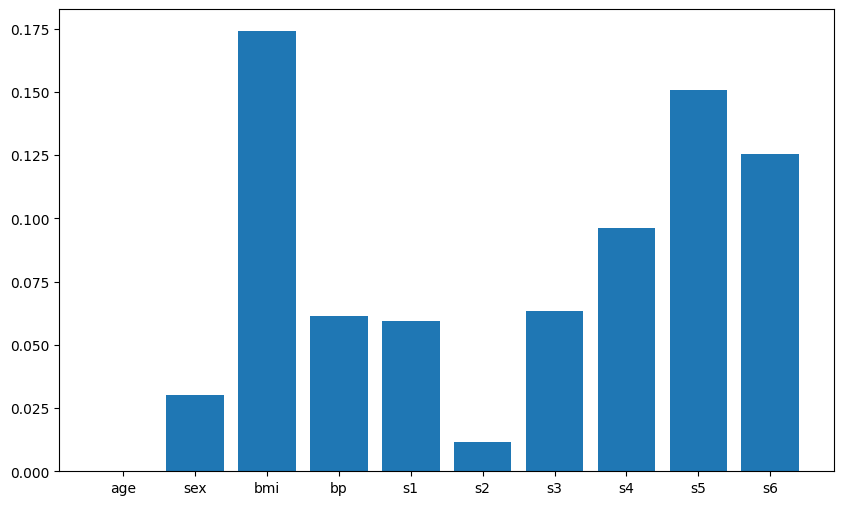

In [11]:
# Visualise Feature Selection
plt.figure(figsize=(10, 6))
plt.bar(feature_names, mi)
plt.show()

In [12]:
# Option 1
x_new = SelectPercentile(mutual_info_regression, percentile=50).fit_transform(x, y)
print(x_new.shape)

(442, 5)


In [15]:
# Option 2
x_new = SelectKBest(mutual_info_regression, k=5).fit_transform(x, y)
print(x_new.shape)

(442, 5)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.47235695313733783


#### Chi Squared
- Is used only for classification problems

In [23]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
dataset = load_breast_cancer()

In [24]:
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(569, 30)


In [25]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

*Before Feature Selection*

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(model.score(x_test, y_test))

0.9210526315789473


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


*After Feature Selection*

In [28]:
from sklearn.feature_selection import chi2, mutual_info_classif, SelectKBest

In [52]:
x_new = SelectKBest(chi2, k=15).fit_transform(x, y)
print(x_new.shape)

(569, 15)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)

In [54]:
model = LogisticRegression()
model.fit(x_train, y_train)
print(model.score(x_test, y_test))

0.9298245614035088


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
chi2(x, y)[0]

array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01])

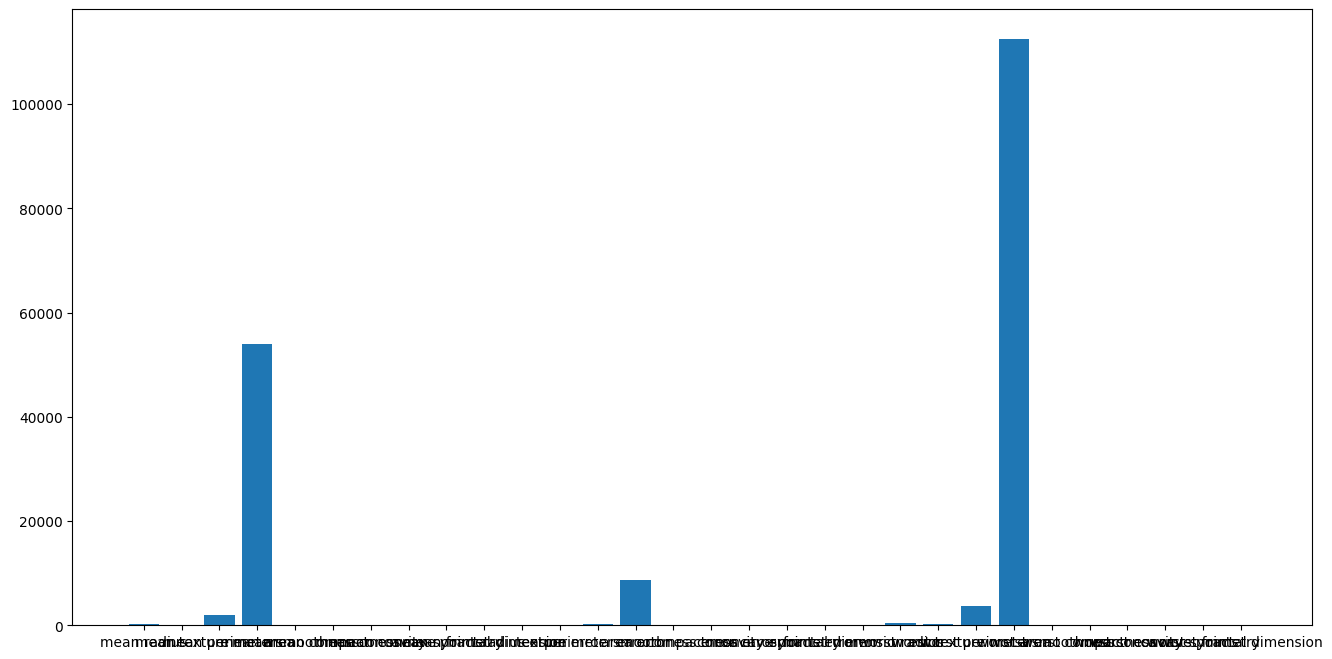

In [56]:
# Visualise Feature Selection
plt.figure(figsize=(16, 8))
plt.bar(feature_names, chi2(x, y)[0])
plt.show()

#### Pearson Correlation


In [61]:
dataset = load_diabetes()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']
print(x.shape)

(442, 10)


**Two ways of usage**

a. Analyse the relationship between 'each' individual feature (input) and output

In [62]:
from sklearn.feature_selection import f_regression, SelectKBest

In [63]:
x_new = SelectKBest(f_regression, k=8).fit_transform(x, y)
print(x_new.shape)

(442, 8)


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.5381605176527189


b. Analyses relationship b/w the features themselves
- Core Idea: Drop features which are highly correlated (dealing only on the input side)

In [66]:
import pandas as pd

In [67]:
x_pd = pd.DataFrame(x, columns=feature_names)
x_pd.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


In [192]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
# Pearson (linear reln), Kendall (non-linear), Spearman (non-linear)
x_pd.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [68]:
import seaborn as sns

<Axes: >

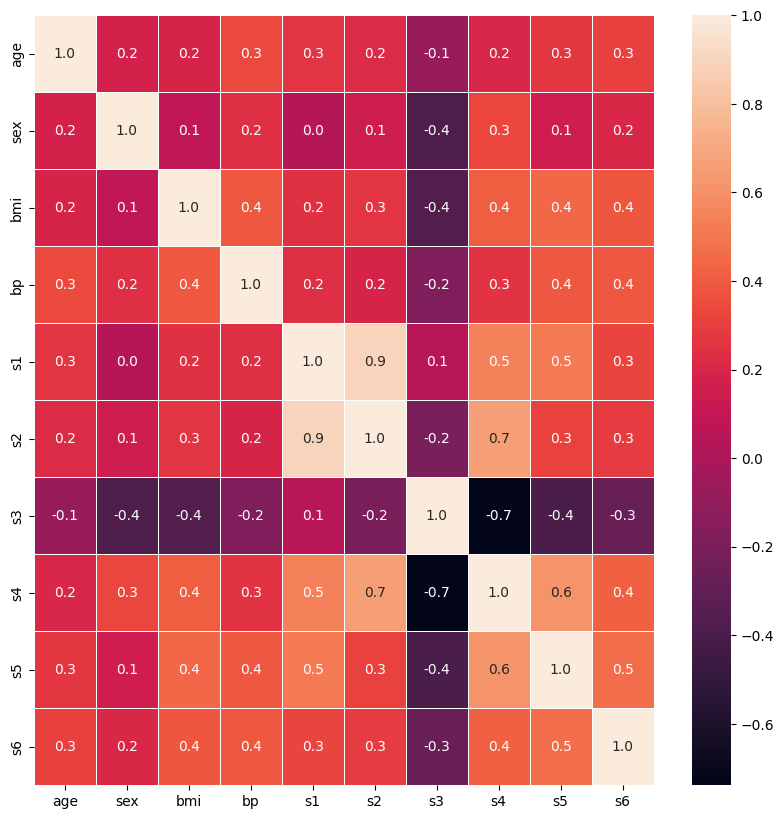

In [69]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(x_pd.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [70]:
x_new = x_pd.drop(['s2', 's3'], axis=1)
x_new.head()

,age,sex,bmi,bp,s1,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,-0.002592,-0.031988,-0.046641


In [71]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.42094596712298593


### **Wrapper Based Methods**
- Train a model on different subsets of features, and select the most accurate one.
- Supervised
- Computationally Expensive!

#### Recurive Feature Elimination (RFE)
- Given an estimator that assigns weights/coeffecients to the features (eg: linear model),
- It starts out by training the model on all the features.
- Then, recursively, removes the least important features, and re-trains the model.
- This process is repeated until we have the desired number of features.

In [72]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso

# Regression
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

estimator = Lasso()
selector = RFE(estimator, n_features_to_select=5, step=1).fit(X, y)
print(selector.ranking_, )

[6 5 1 1 4 3 2 1 1 1]


In [73]:
X_new = selector.transform(X)
print(X_new.shape)

(442, 5)


In [74]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.4520725834320558


#### Select from Model

In [76]:
# Using estimators that assign weights to the features

from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel

In [77]:
X, y = load_iris(return_X_y=True)
X.shape

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)

In [78]:
X_new = model.transform(X)
X_new.shape

(150, 3)

#### Sequential Feature Selection
- Doesn't require the underlying model to provide co-efficient weights, such as SelectFromModel, and RFE

- Forward:  Finds the best new feature to add to the set of selected features. Concretely, we initially start with zero features and find the one feature that maximizes a cross-validated score when an estimator is trained on this single feature. Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features. The procedure stops when the desired number of selected features is reached, as determined by the n_features_to_select parameter.

- Backward: Starts from 'n' features, and removes 1 at a time till we reach the desired number of features

In [79]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV

# Regression
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
ridge = RidgeCV().fit(X, y)

In [80]:
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X, y)

print(sfs_forward)

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')


In [81]:
X_new = sfs_forward.transform(X)
X_new.shape

(442, 5)

In [82]:
## Important: You can now use any model with these newly selected features
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.49840616192442455


### **Embedded Methods**
- As a function of the algorithm, feature selection automatically happens.
- Eg: Lasso Regularisation, Random-Forest

In [ ]:
# See prior notebook on lasso model

# **Unsupervised**

## PCA
- Dimenisonality Reduction technique that transforms the features into a new space where we can select features on the basis of variance captured (eigen values)
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [83]:
dataset = load_diabetes()
x = dataset['data']
y = dataset['target']
feature_names = dataset['feature_names']

print(x.shape)

(442, 10)


In [84]:
from sklearn.decomposition import PCA
X_new = PCA(n_components=4, svd_solver='full').fit_transform(x)
print(X_new.shape)

(442, 4)


In [85]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred))

0.49943683803422245
